In [1]:
"""
distributed GMCA - python/C++ version
"""

import sys
sys.path.append("../codes/")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from utils_dgmca import divisorGenerator
from utils_dgmca import Make_Experiment_GG
from misc_dgmca import *
import DGMCA_omp as dgo
import copy as cp
import time
import scipy.io as sio

fsize = 16
vcol = ['mediumseagreen','crimson','steelblue','darkmagenta','burlywood','khaki','lightblue','darkseagreen','deepskyblue','forestgreen','gold','indianred','midnightblue','olive','orangered','orchid','red','steelblue']
font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : fsize}
plt.rc('font', **font)
plt.rcParams["figure.figsize"] = (15,10)


## Let's generate some data

In [2]:
totalSize = 10000 # nb of samples per source
n_s = 2 # Number of sources
n_obs = 5 # Number of observations
rho = 0.1 # Generalized Gaussian generation parameter
nmax = 500 # max number of iterations
kend = 1. # thresholding parameter

X,X0,A0,S0,N = Make_Experiment_GG(n_s=n_s,n_obs=n_obs,t_samp=totalSize,noise_level=40.0,dynamic=1,CondNumber=1,alpha=rho)

## Let's run the dGMCA code

In [6]:
AggMeth = 'rFM' # estimator aggregation method - Frechet mean is 'FM', robust Frechet Mean is 'rFM'
Ainit = np.random.randn(n_obs,n_s)
Ainit = Ainit/np.maximum(0,np.linalg.norm(Ainit,axis=0))

# A0 is given here to follow the evolution of the performances along the iterative process

BS = 25 # batch size
out_omp25,FMw1000,th25,Oca25,Osad25,Ocam25,Osadm25 = dgo.Core_DGMCA(X=X,n=n_s,A=Ainit,kend=kend,q_f=0.1,AggMeth='rFM',nmax=nmax,BlockSize = n_s,L0=1,verb=0,Kmax=0.5,tol=1e-12, subBlockSize=BS,alphaEstOpt=1,alpha_exp=2.,A0=A0)

Text(0.5, 1.0, 'Evolution of the mean mixing matrix criterion')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


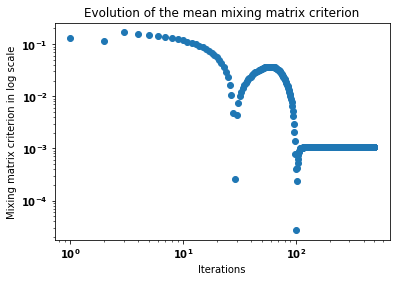

In [7]:
plt.loglog(Ocam25,'o')
plt.ylabel("Mixing matrix criterion in log scale")
plt.xlabel("Iterations")
plt.title('Evolution of the mean mixing matrix criterion')

Text(0.5, 1.0, 'Histogram of the mixing matrix criterion for all batches at the last iteration')

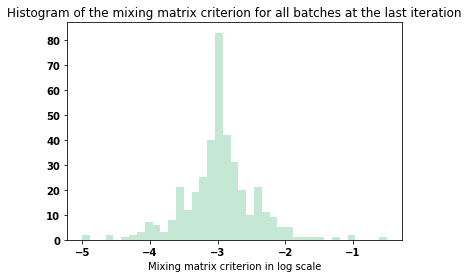

In [8]:
niter = -1
bins = np.linspace(-5, -0.5, 40)
out = plt.hist(np.log10(Oca25[niter]),bins,alpha=0.3,color=vcol[0])
plt.xlabel("Mixing matrix criterion in log scale")
plt.title('Histogram of the mixing matrix criterion for all batches at the last iteration')

### More to come soon ...